# **텐서플로우 튜토리얼 #2 - 신경망 훈련하기: 기초적인 분류 문제**

텐서플로우의 공식 웹사이트 튜토리얼을 참고하였습니다.
https://www.tensorflow.org/tutorials/keras/classification

운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련해봅시다.

먼저 tensorflow, keras, numpy, pyplot을 임포트합니다.



In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

## fashion MNIST 데이터셋 임포트하기

MNIST 데이터셋:

+ 0~255 사이의 값을 가진 28x28 흑백이미지와 실제 숫자값에 해당하는 데이터세트가 총 7만개가 주어집니다.
+ 6만개는 학습용, 1만개는 테스트용으로 주어집니다.
+ MNIST 데이터셋 유형으로는 손글씨, 숫자, 패션 등이 있습니다.

여기서 학습용 데이터는 예측모델을 학습하는 용도로 사용하고 테스트용 데이터는 학습에 사용되지 않고 새로운 값에 대해 어느정도로 예측하는지 검증하는 용도로 사용합니다.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

keras에서 fashion MNIST 데이터셋을 임포트합니다.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다.

* `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 **훈련 세트**.
* `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 **테스트 세트**.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타냅니다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

모델을 훈련하기 전에 데이터셋 구조를 살펴봅시다. 

다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 

각 이미지는 28x28 픽셀로 표현됩니다.

In [4]:
train_images.shape

(60000, 28, 28)

훈련 세트에는 60,000개의 레이블이 있습니다.

In [5]:
len(train_labels)

60000

각 레이블은 0과 9사이의 정수입니다.

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

테스트 세트도 마찬가지로 살펴봅시다.

In [8]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 

훈련 세트에 있는 첫 번째 이미지를 출력해봅시다.

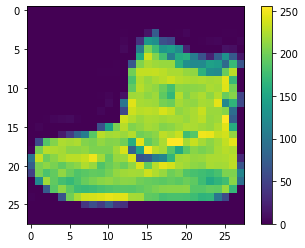

In [13]:
plt.figure()  # plot 생성
plt.imshow(train_images[0])  # plot에 나타낼 이미지 : 훈련 세트 첫 번째 이미지
plt.colorbar()  # 우측에 그라데이션 바 생성
plt.grid(False)  # 그리드선 없애기
plt.show()  # plot 출력

그림은 픽셀 값의 범위가 0~255 사이이며, 오른쪽 그라데이션에 대응되는 색으로 나타나는 것을 볼 수 있습니다.

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하기 위해 255로 나눕니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다.

In [14]:
train_images = train_images / 255.0  # 0~1 사이 값으로 나타내기

test_images = test_images / 255.0  # 0~1 사이 값으로 나타내기

*훈련 세트*에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해봅시다. 

데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

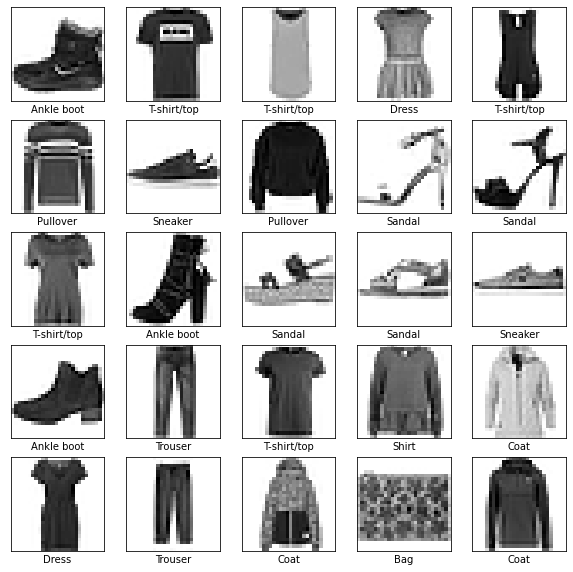

In [15]:
plt.figure(figsize=(10,10))  # plot 사이즈 설정
for i in range(25):  # 0~24의 이미지
    plt.subplot(5,5,i+1)  # 5 x 5
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  # 그리드선 없애기
    plt.imshow(train_images[i], cmap=plt.cm.binary)  # 보여지는 이미지 : 훈련 세트 이미지(0~24)
    plt.xlabel(class_names[train_labels[i]])  # 앞서 지정했던 변수 class_names로 그림 밑에 레이블 표시
plt.show()  # plot 출력

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정

신경망의 기본 구성 요소는 *층*(layer)입니다. 층은 주입된 데이터에서 표현을 추출합니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 28 x 28 의 픽셀 배열 이미지를 펼친다.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 레이블이 0~9 이므로 10개이다.
])

신경망의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 층은 128개의 노드(또는 뉴런)를 가집니다. 마지막 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 **현재 이미지가 10개 클래스(0~9) 중 하나에 속할 확률**을 출력합니다.

실제로 이후에 모델을 예측(predict)할 때 마지막 층과 관련한 10개의 데이터가 출력됩니다.

### 모델 컴파일

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 *컴파일* 단계에서 추가됩니다.

* *옵티마이저*(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* *손실 함수*(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
* *지표*(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

신경망 모델을 훈련하는 단계는 다음과 같습니다.

1. 훈련 데이터를 모델에 주입합니다-이 예제에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예제에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.

훈련을 시작하기 위해 `model.fit` 메서드를 호출하면 모델이 훈련 데이터를 학습합니다.

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5006 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8910


모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성합니다.

## 정확도 평가

그다음 테스트 세트에서 모델의 성능을 비교합니다:

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3526 - accuracy: 0.8735

테스트 정확도: 0.8734999895095825


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 *과대적합*(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

## 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.

`test_images`를 이용해서 모델을 예측해봅시다.

In [20]:
predictions = model.predict(test_images)

테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 

첫 번째 예측을 확인해봅시다.

In [21]:
predictions[0]

array([3.8094670e-06, 2.2688599e-07, 1.3290678e-07, 6.5373422e-09,
       1.3952868e-07, 7.9540648e-03, 4.9834298e-06, 1.0875461e-01,
       3.7168851e-05, 8.8324493e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 각 배열의 인덱스가 레이블을 나타내고, 각 원소는 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아봅시다.

In [22]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있습니다. 

이 값이 맞는지 테스트 레이블을 확인해봅시다.

In [23]:
test_labels[0]

9

10개 클래스에 대한 예측을 모두 그래프로 표현해봅시다.

In [24]:
def plot_image(i, predictions_array, true_label, img): # 0~9999, 예측된 레이블, 실제 테스트 레이블, i에 해당하는 이미지
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)  # i번째에 해당하는 이미지 보여주기

  predicted_label = np.argmax(predictions_array)  # 예측된 레이블(0~9)의 확률 중 가장 큰 값
  if predicted_label == true_label:  # 예측된 레이블(가장 큰 값)이 실제 레이블과 같다면
    color = 'blue'
  else:
    color = 'red'
# 그림 밑에 예측된 레이블에 해당하는 클래스, 확률(%), 실제 레이블에 해당하는 클래스를 지정한 색으로 출력
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label): # 0~9999, 예측된 레이블, 실제 테스트 레이블
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")  # 10개의 예측된 레이블을 막대그래프로 출력
  plt.ylim([0, 1])  # y축 값 범위 0~1
  predicted_label = np.argmax(predictions_array)  # 확률이 가장 높은 레이블

  thisplot[predicted_label].set_color('red')  # 확률이 가장 높은 레이블의 막대는 빨간색
  thisplot[true_label].set_color('blue')  # 실제 레이블의 막대는 파란색, 둘이 같을 시 파란색만 표시된다.

0, 12번째 원소의 이미지, 예측된 레이블, 신뢰도를 0~9의 모든 신뢰도를 나타낸 그래프와 함께 확인해 보겠습니다.

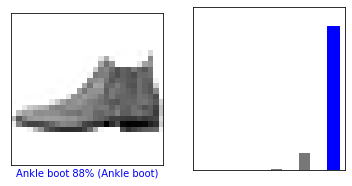

In [25]:
i = 0
plt.figure(figsize=(6,3))  # 전체 plot 사이즈 지정(x, y)
plt.subplot(1,2,1)  # 전체 사이즈에서 1 x 2 크기로 칸을 나누고 첫 번째 칸에 subplot 생성
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)  # 전체 사이즈에서 1 x 2 크기로 칸을 나누고 두 번째 칸에 subplot 생성
plot_value_array(i, predictions,  test_labels)
plt.show()

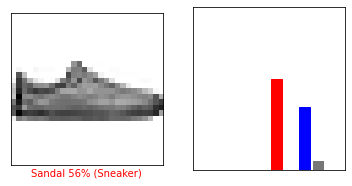

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

0~14번째 원소의 이미지, 예측된 레이블, 신뢰도를 그래프와 함께 확인해보겠습니다.

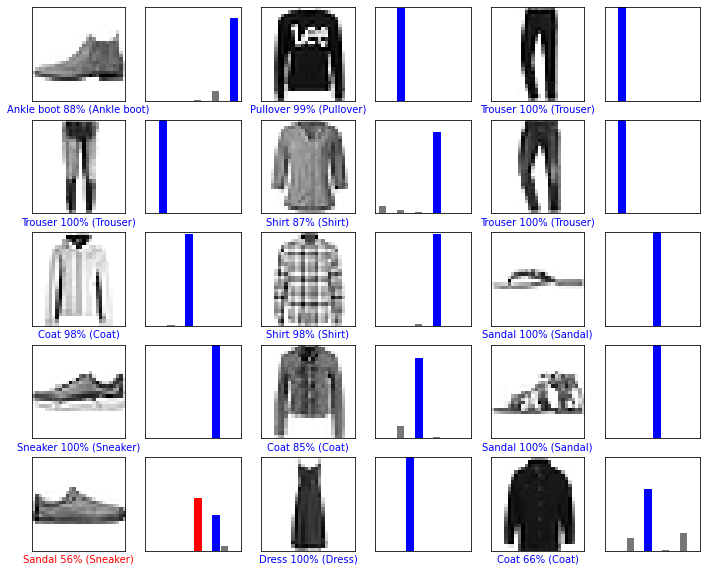

In [27]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

지금까지 `test_images` 배열 속 여러 이미지들을 이용해 예측해보았습니다.

마지막으로 훈련된 모델을 사용하여 여러 이미지가 아닌 단 하나의 이미지에 대한 예측을 만들어봅시다.

In [28]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어 있습니다.

하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다.

In [29]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.8094597e-06 2.2688599e-07 1.3290678e-07 6.5373298e-09 1.3952868e-07
  7.9540610e-03 4.9834252e-06 1.0875458e-01 3.7168851e-05 8.8324493e-01]]


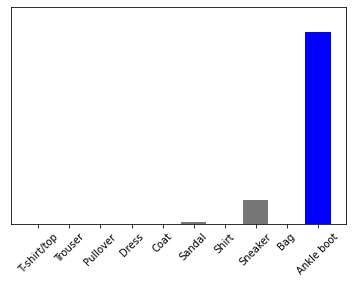

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)  # 출력될 plot의 x축 인덱스(클래스) 표시, 45도 기울여서

In [32]:
np.argmax(predictions_single[0])

9